### Feature Scaling Example

You have now seen how feature scaling might change the clusters we obtain from the kmeans algorithm, but it is time to try it out!

First let's get some data to work with.  The first cell here will read in the necessary libraries, generate data, and make a plot of the data you will be working with throughout the rest of the notebook.

The dataset you will work with through the notebook is then stored in **data**.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.datasets.samples_generator import make_blobs
import tests2 as t

%matplotlib inline

In [2]:
# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']

In [3]:
def create_data():
    # Size = 120 x 2 、　範囲：-3～+3、　絶対値　のデータを作成
    n_points = 120
    X = np.random.RandomState(3200000).uniform(-3, 3, [n_points, 2])
    X_abs = np.absolute(X)

    # 1.2 未満のデータを検索 : True/Falseのデータ
    inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
    
    # 2列の和が　5.3 より大きいデータを検索 : True/Falseのデータ
    outer_ring_flag = X_abs.sum(axis = 1) > 5.3
    
    # NOR : http://www.asahi-net.or.jp/~ax2s-kmtn/ref/logicope.html
    keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))
    X    = X[keep]
    
    # データをカット　：　Size = 60 X 2
    X = X[:60] # only keep first 60
    
    # X1 = X * W + B　という計算を実行
    X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])
    
    # nd_array -> DataFrame に変換し、列名を定義
    data = pd.DataFrame(X1)
    data.columns = ['5k_Time', 'Raw_Test_Score']   
    return data

In [4]:
def plot_data(data):
   #plt.figure(figsize = [15,15])
    plt.figure()
    font_size = 14
    
    # DataFrame -> nd_array
    X = data.iloc[:,0].values
    Y = data.iloc[:,1].values
    
    # 散布図
    plt.scatter( X , Y, s = 64, c = plot_colors[-1])

    plt.xlabel('5k Completion Time (min)', size = font_size)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = font_size)
    plt.ylabel('Test Score (raw)', size = font_size)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = font_size)
    plt.grid()
    ax = plt.gca()
    
    # top　と　right　の　枠線を消す
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # line　の　幅を設定
    [side.set_linewidth(2) for side in ax.spines.values()]
    
    # 分割線　の　幅を設定
    ax.tick_params(width = 2)
    
    # 画像の保存
    plt.savefig('C18_FeatScalingEx_01.png', transparent = True)

In [5]:
data = create_data()
data.describe()

,5k_Time,Raw_Test_Score
count,60.000000,60.000000
mean,22.899027,511.699603
std,4.536244,183.222427
min,15.263902,206.597283
25%,18.820638,361.798208
50%,24.033613,545.795365
75%,26.956643,656.346547
max,29.867819,797.599192


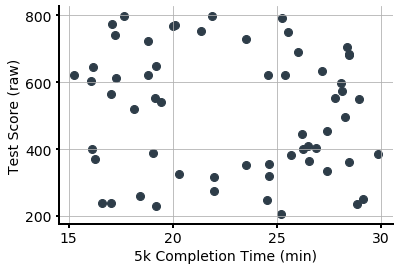

In [6]:
plot_data(data)

`1.` Take a look at the dataset.  Are there any missing values?  What is the average completion time?  What is the average raw test score?  Use the cells below to find the answers to these questions, and the dictioonary to match values and check against our solution.

In [7]:
# cell for work
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
5k_Time           60 non-null float64
Raw_Test_Score    60 non-null float64
dtypes: float64(2)
memory usage: 1.0 KB


In [8]:
# another cell for work
data.describe()

,5k_Time,Raw_Test_Score
count,60.000000,60.000000
mean,22.899027,511.699603
std,4.536244,183.222427
min,15.263902,206.597283
25%,18.820638,361.798208
50%,24.033613,545.795365
75%,26.956643,656.346547
max,29.867819,797.599192


In [9]:
# Use the dictionary to match the values to the corresponding statements
a = 0
b = 60
c = 22.9
d = 4.53
e = 511.7

q1_dict = {
'number of missing values':             a, # letter here,
'the mean 5k time in minutes':          c, # letter here,    
'the mean test score as a raw value':   e, # letter here,
'number of individuals in the dataset': b  # letter here
}

# check your answer against ours here
t.check_q1(q1_dict)

That looks right!


`2.` Now, instantiate a kmeans `model` with 2 cluster centers.  Use your model to `fit` and `predict` the the group of each point in your dataset.  Store the predictions in `preds`.  If you correctly created the model and predictions, you should see a top (blue) cluster and bottom (pink) cluster when running the following cell.

In [10]:
# モデル作成
model = KMeans( n_clusters = 2)

# Fit　と　Predict　を同時実行
preds = model.fit_predict(data)
print("preds = \n", preds)

preds = 
 [0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0]


In [11]:
# data = 元データ
# preds = 予測結果：分類番号
# n_clusters = 中心の数
def plot_clusters(data, preds, n_clusters):
    #plt.figure(figsize = [15,15])
    font_size = 14

    for k, col in zip( range(n_clusters), plot_colors[ : n_clusters ]):
        # preds == k　を検索、True/Falseが返る
        my_members = (preds == k)
        
        # s = marker_size  / c = color_type、上で決めたセルの文字列を参照
        plt.scatter(data['5k_Time'][my_members], data['Raw_Test_Score'][my_members], s = 64, c = col)

    plt.xlabel('5k Completion Time (min)', size = font_size)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = font_size)
    plt.ylabel('Test Score (raw)', size = font_size)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = font_size)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)

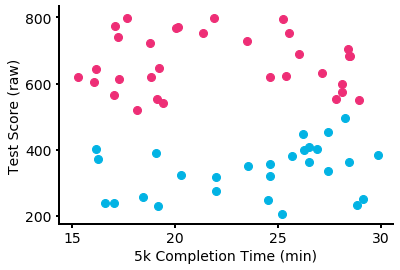

In [12]:
plot_clusters(data, preds, 2)

`3.` Now create two new columns to add to your `data` dataframe.  The first is `test_scaled`, which you should create by subtracting the mean test score and dividing by the standard deviation test score.  

The second column to create is `5k_time_sec`, which should have the minutes changed to seconds.

In [13]:
# データ代入
tmp_data            = data['Raw_Test_Score']

# 平均値　＝　0　にする
data['test_scaled'] = tmp_data - np.mean(tmp_data)

# 標準偏差　＝　1　にする
data['test_scaled'] = data['test_scaled'] / (np.std(tmp_data))

# 分　を　秒　にする　：　【注意】1行上とは異なるデータを60倍
data['5k_time_sec'] = data['5k_Time'] * 60# times in seconds

In [14]:
data.describe()

,5k_Time,Raw_Test_Score,test_scaled,5k_time_sec
count,60.000000,60.000000,6.000000e+01,60.000000
mean,22.899027,511.699603,1.665335e-16,1373.941601
std,4.536244,183.222427,1.008439e+00,272.174614
min,15.263902,206.597283,-1.679254e+00,915.834115
25%,18.820638,361.798208,-8.250432e-01,1129.238298
50%,24.033613,545.795365,1.876599e-01,1442.016785
75%,26.956643,656.346547,7.961231e-01,1617.398565
max,29.867819,797.599192,1.573564e+00,1792.069129


`4.` Now, similar to what you did in question 2, instantiate a kmeans `model` with 2 cluster centers.  Use your model to `fit` and `predict` the the group of each point in your dataset.  Store the predictions in `preds`.  If you correctly created the model and predictions, you should see a right (blue) cluster and left (pink) cluster when running the following cell.

In [15]:
model = KMeans(n_clusters=2)
preds = model.fit_predict(data)
print("preds = \n", preds)

preds = 
 [1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


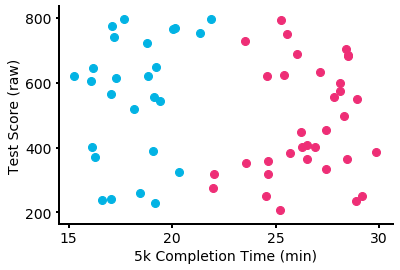

In [16]:
# Run this to see your results
plot_clusters(data, preds, 2)

`5.` Match the variable that best describes the way you should think of feature scaling with algorithms that use distance based metrics or regularization.

In [17]:
# options
a = 'We should always use normalizing'
b = 'We should always scale our variables between 0 and 1.'
c = 'Variable scale will frequently influence your results, \
     so it is important to standardize for all of these algorithms.'
d = 'Scaling will not change the results of your output.'

best_option = c # best answer variable here

# check your answer against ours here
t.check_q5(best_option)

Variable scale will frequently influence your results, so it is important to standardize for all of these algorithms.


###  If you get stuck, you can find a solution by pushing the orange icon in the top left of this notebook.